In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [106]:
df = pd.read_csv("covid_19_data.csv")
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [79]:
import matplotlib.style as style

## For Styling..
style.use('ggplot')
plt.rcParams['font.family'] = "serif"

In [6]:
df.shape

(23481, 8)

In [7]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     12195
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [240]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,20574.000000,20574.000000,20574.000000,20574.000000
mean,10287.500000,3759.672840,235.671624,999.194615
std,5939.346555,17740.018084,1656.794253,7050.768499
min,1.000000,0.000000,0.000000,0.000000
25%,5144.250000,11.000000,0.000000,0.000000
50%,10287.500000,125.000000,1.000000,2.000000
75%,15430.750000,855.000000,12.000000,93.000000
max,20574.000000,308314.000000,28236.000000,164015.000000


In [107]:
df.columns = ['SNo','Date','State','Country','Last Update','Confirmed','Deaths','Recovered']

In [108]:
df.head(5)

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [109]:
df.Country = df['Country'].replace({'Mainland China':'China'})

In [110]:
df.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0


Text(0, 0.5, 'Count')

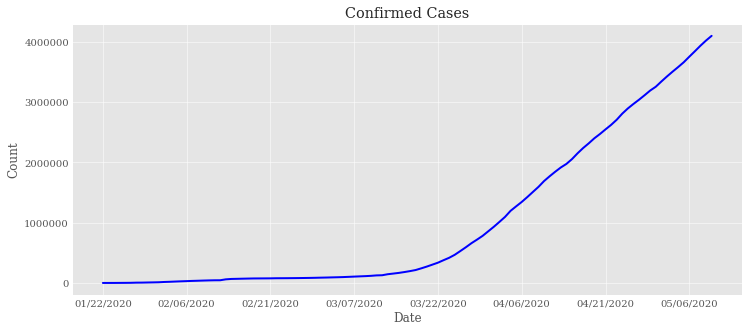

In [85]:
plt.figure(figsize = (12,5))
plt.plot(df.groupby('Date')['Confirmed'].sum(),c='b')
plt.xticks(range(0,df.Date.nunique(),15),)
plt.title('Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

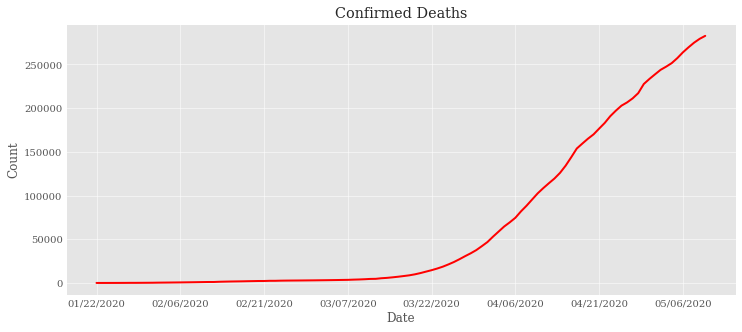

In [86]:
plt.figure(figsize = (12,5))
plt.plot(df.groupby('Date')['Deaths'].sum(),color = 'r')
plt.xticks(np.arange(0,df.Date.nunique(),15))
plt.title('Confirmed Deaths')
plt.xlabel('Date')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

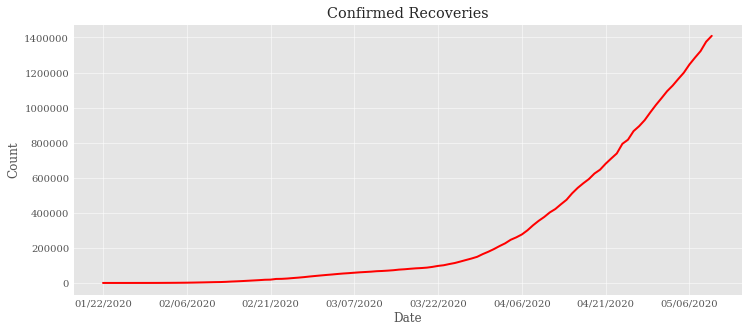

In [87]:
plt.figure(figsize = (12,5))
plt.plot(df.groupby('Date')['Recovered'].sum(),color = 'r')
plt.xticks(np.arange(0,df.Date.nunique(),15))
plt.title('Confirmed Recoveries')
plt.xlabel('Date')
plt.ylabel('Count')

In [196]:
df.Confirmed = df.Confirmed.astype(int)
df.Deaths = df.Deaths.astype(int)
df.Recovered = df.Recovered.astype(int)

In [197]:
latest_data = df[df['Date'] == max(df['Date'])]

In [198]:
df_country = latest_data.groupby('Country')['Confirmed','Deaths','Recovered'].sum().sort_values('Confirmed',ascending = False)[:15].reset_index()

In [199]:
df_country

,Country,Confirmed,Deaths,Recovered
0,US,1329260,79526,216169
1,Spain,224350,26621,136166
2,UK,220449,31930,1002
3,Italy,219070,30560,105186
4,Russia,209688,1915,34306
5,France,177094,26383,56327
6,Germany,171879,7569,144400
7,Brazil,162699,11123,64957
8,Turkey,138657,3786,92691
9,Iran,107603,6640,86143


Text(0.5, 1.0, 'Total Cases of Top 15 Countries')

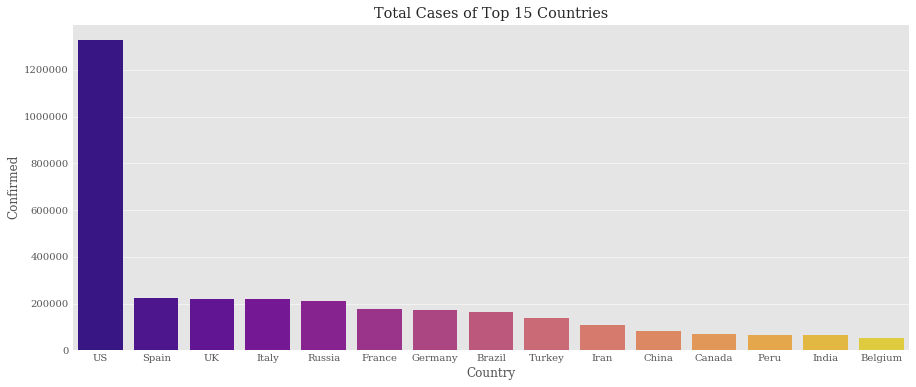

In [206]:
plt.figure(figsize = [15,6])
sns.barplot('Country','Confirmed', data = df_country, palette = 'plasma')
plt.title('Total Cases of Top 15 Countries')

Text(0.5, 1.0, 'Total Deaths of Top 15 Countries')

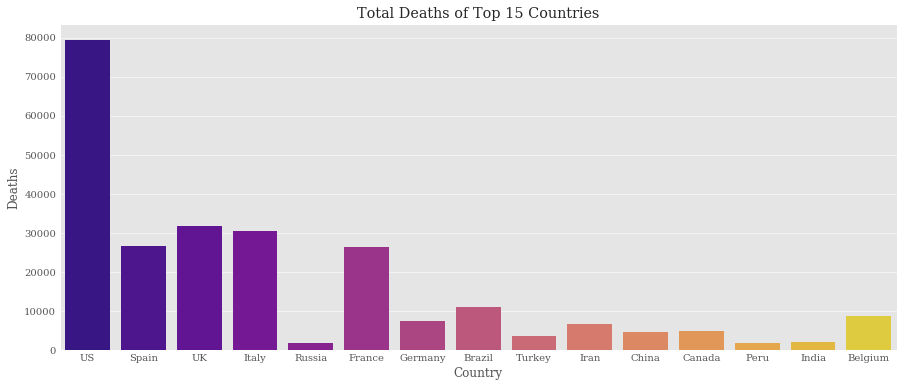

In [204]:
plt.figure(figsize = [15,6])
sns.barplot('Country','Deaths', data = df_country, palette = 'plasma')
plt.title('Total Deaths of Top 15 Countries')

Text(0.5, 1.0, 'Total Recoveries of Top 15 Countries')

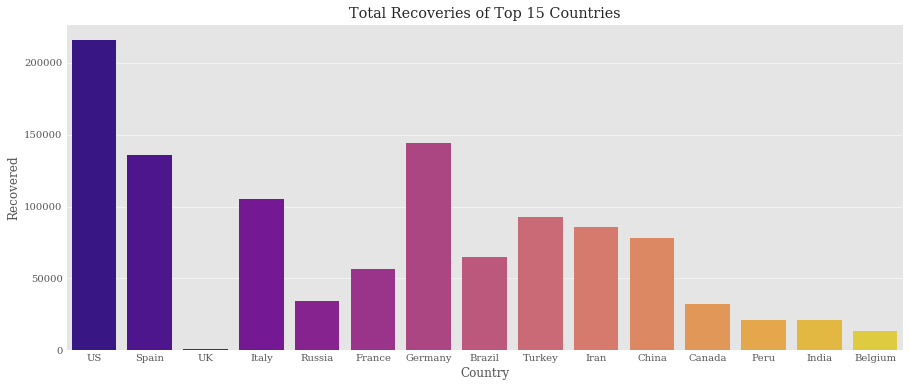

In [205]:
plt.figure(figsize = [15,6])
sns.barplot('Country','Recovered', data = df_country, palette = 'plasma')
plt.title('Total Recoveries of Top 15 Countries')

In [148]:
df_country['Deaths/Total'] = df_country['Deaths']/df_country['Confirmed']
df_country['Recovered/Total'] = df_country['Recovered']/df_country['Confirmed']

In [149]:
df_country.head()

,Country,Confirmed,Deaths,Recovered,Deaths/Total,Recovered/Total
0,US,1329260,79526,216169,0.059827,0.162624
1,Spain,224350,26621,136166,0.118658,0.606936
2,UK,220449,31930,1002,0.144841,0.004545
3,Italy,219070,30560,105186,0.139499,0.480148
4,Russia,209688,1915,34306,0.009133,0.163605


## Death Percentage in Top 15 countries

Text(0.5, 0, 'Death %')

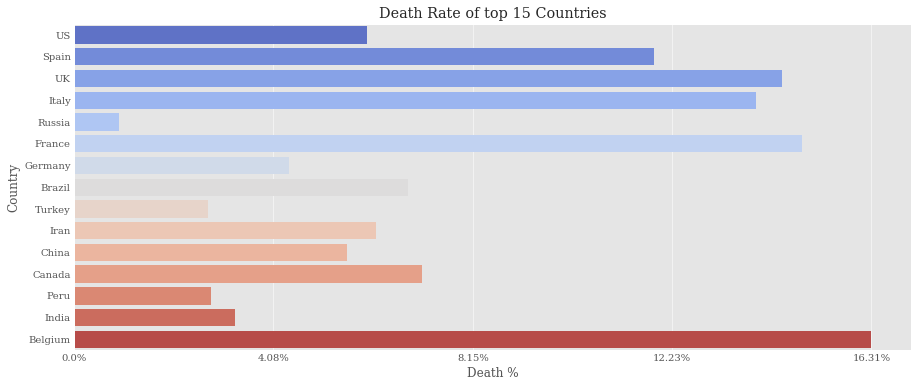

In [194]:
plt.figure(figsize = [15,6])
sns.barplot('Deaths/Total','Country',data = df_country,palette = 'coolwarm')
labels = list(np.linspace(0,max(df_country['Deaths/Total']),5)*100)
labels = [str(round(elem, 2))+'%' for elem in labels]
plt.xticks(np.linspace(0,max(df_country['Deaths/Total']),5),labels)
plt.title('Death Rate of top 15 Countries')
plt.xlabel('Death %')

## Recovery Percentage in Top 15 countries

Text(0.5, 0, 'Recovered %')

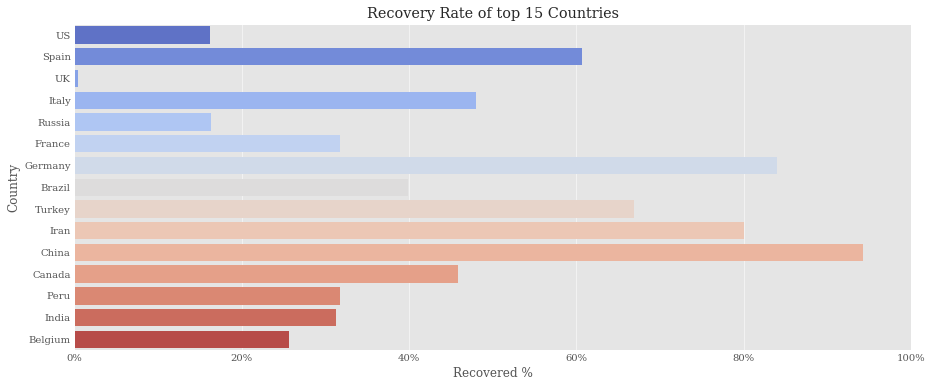

In [163]:
plt.figure(figsize = [15,6])
sns.barplot('Recovered/Total','Country',data = df_country,palette = 'coolwarm')
plt.xticks(np.linspace(0,1,`6),['0%','20%','40%','60%','80%','100%'])
plt.title('Recovery Rate of top 15 Countries')
plt.xlabel('Recovered %')